In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', None)

In [14]:
#load dataset from text document
data = pd.read_csv('Churntxt.txt', sep=',')

In [15]:
data.shape

(7043, 21)

In [16]:
data.head(5) 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


At first, glance noticed some payments are (automatic) under further inspection all Bank transfer and Credit card payments are (automatic), however, I decided to add an extra column to lable automatic payments to make it easier to compare automatic and non-automatic payments later in the analysis 

In [17]:
#adding automatic column
auto = data['PaymentMethod'].str.contains('(automatic)')
data['AutomaticMethod'] = auto

data['SeniorCitizen'] = data['SeniorCitizen'].replace([1,0],[True,False])

#Costomers who have been with the provider 0 months have ' ' in place where thier total charge would be
#This changes ' ' to 0 and switched the colomn to an intager
data = data.replace(' ',0)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

data.to_csv('ChurnCleaned.csv')

C:\Users\gonz3\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [6]:
data.describe(include='all') 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AutomaticMethod
count,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043,7043
unique,7043,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2,2
top,8190-ZTQFB,Male,False,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No,False
freq,1,3555,5901,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174,3977
mean,NaN,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN,NaN


In [7]:
#Breacking the data into catogries for EDA

#All columns with categorical data
categorical = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
 'Contract','PaperlessBilling','PaymentMethod','AutomaticMethod']

#All columns with numerical data
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECA6B948E0>,
      dtype=object)

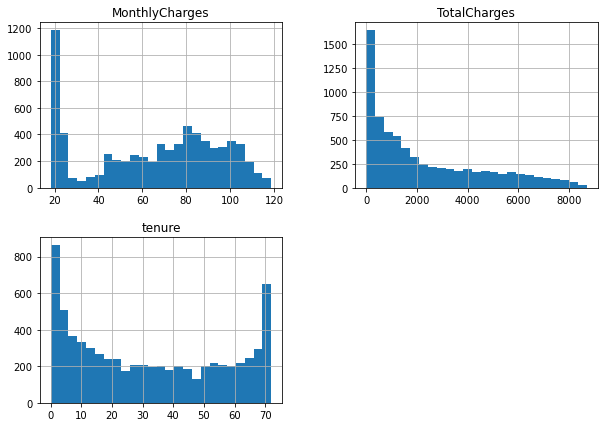

In [8]:
data[numerical].hist(bins=25, figsize=(10, 7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECA6F70370>,
      dtype=object)

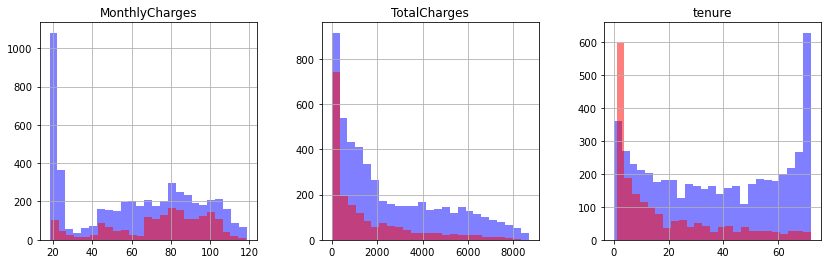

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
data[data['Churn'] == "No"][numerical].hist(bins=25, color="blue", alpha=0.5, ax=ax)
data[data['Churn']== "Yes"][numerical].hist(bins=25, color="red", alpha=0.5, ax=ax)

It seems that the shorter the tenure the more likely a customer is to churn 

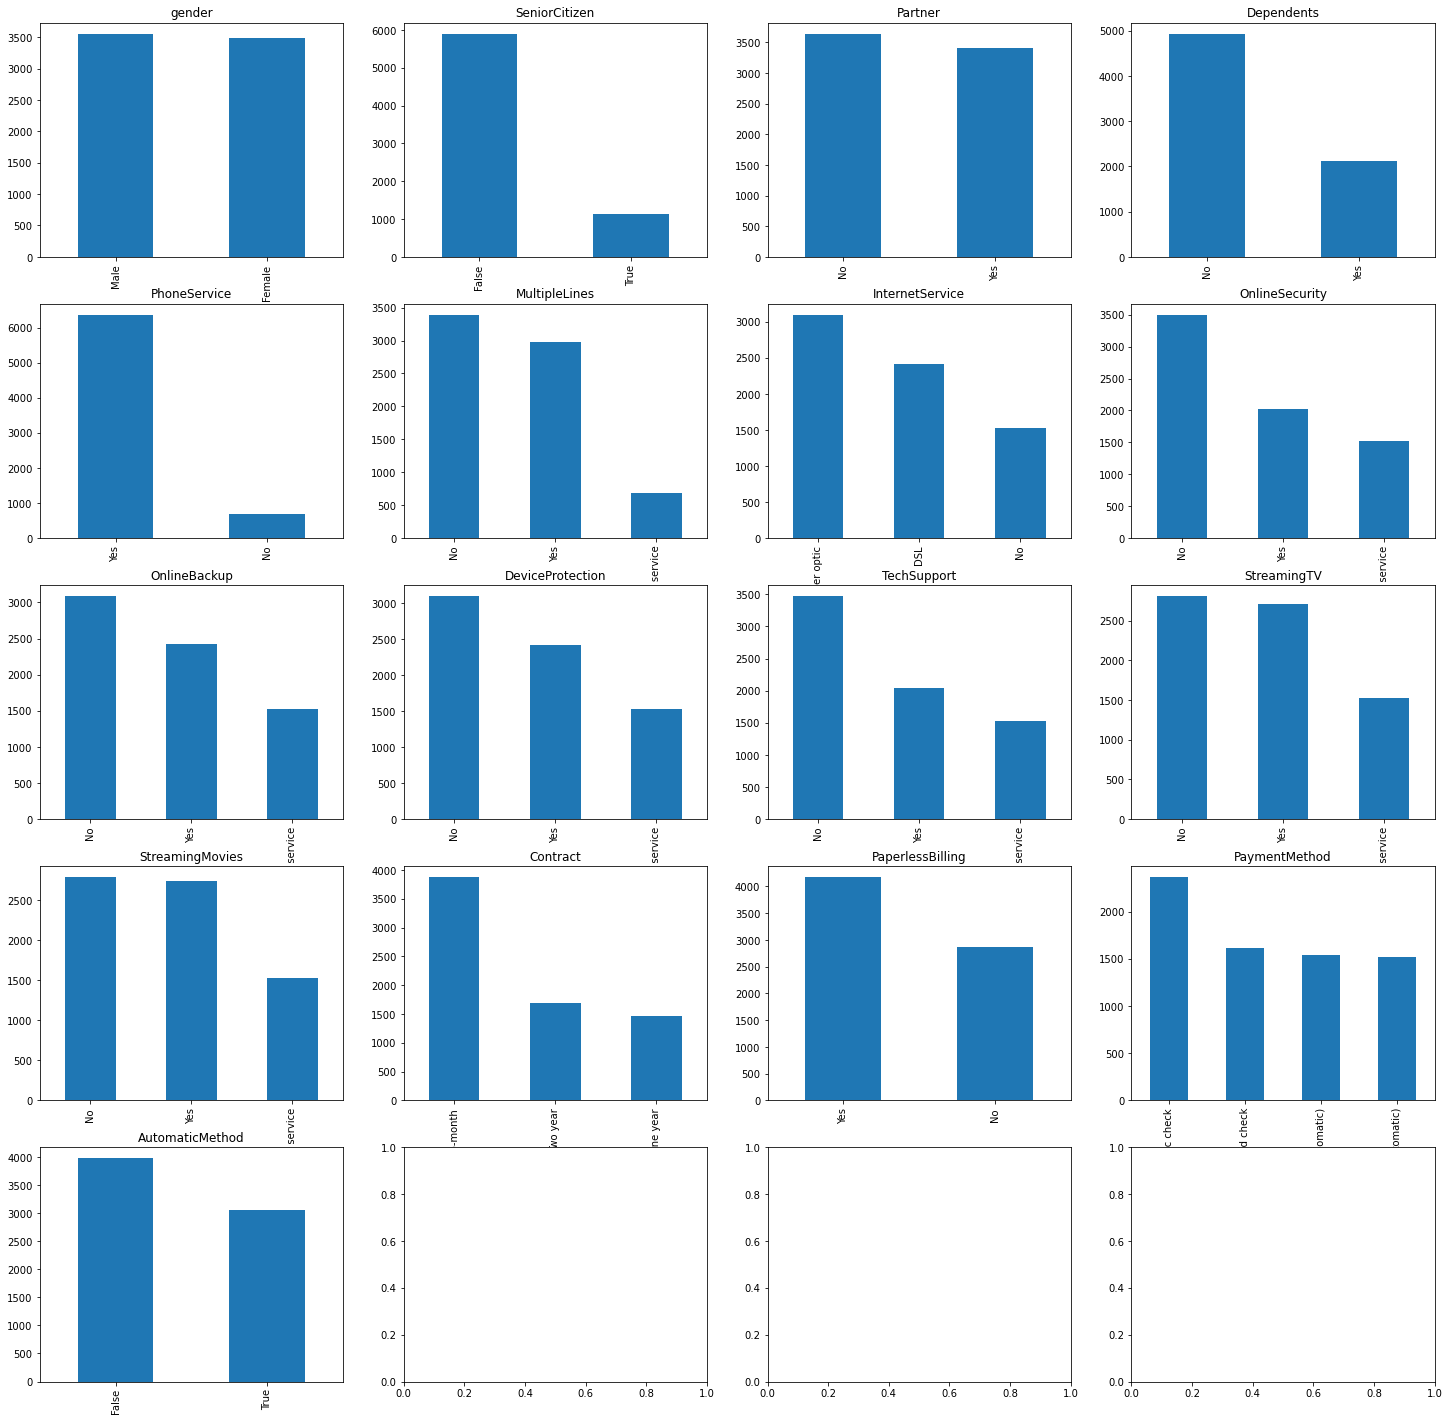

In [10]:
ROWS, COLS = 5, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(25, 25))
row, col = 0, 0
for i, feature in enumerate(categorical):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    data[feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(feature)

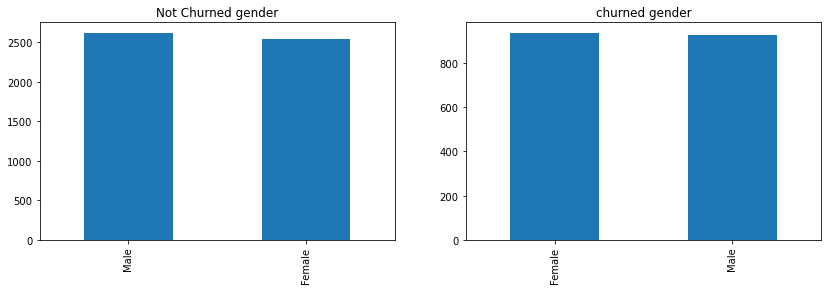

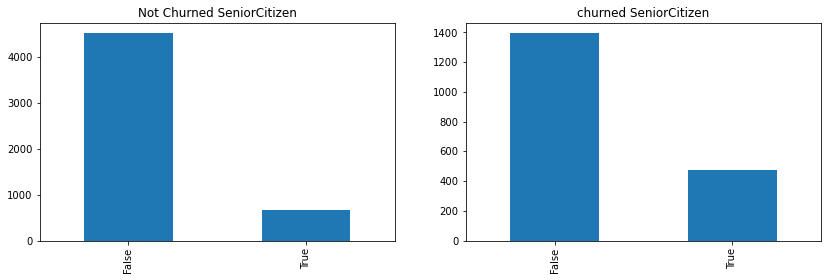

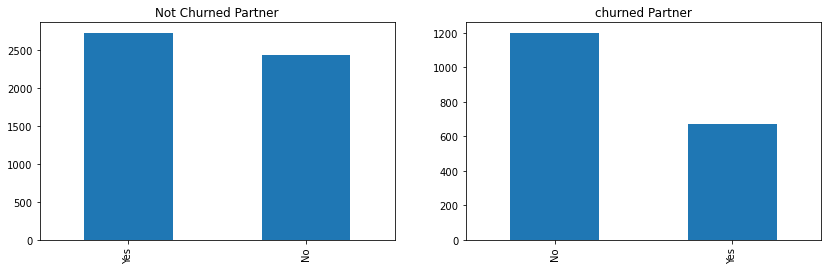

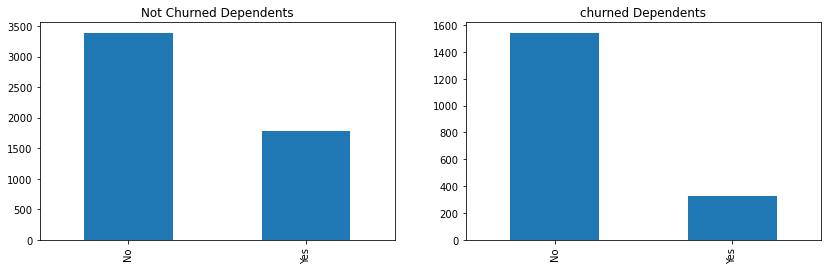

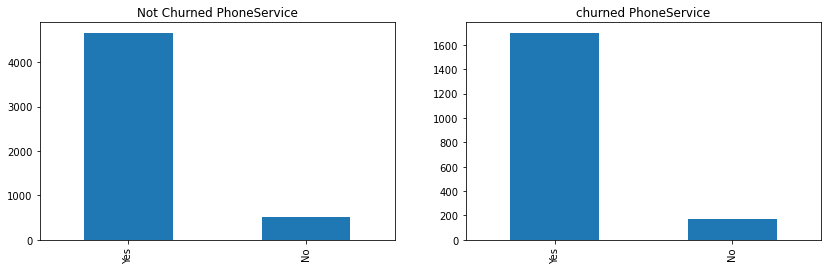

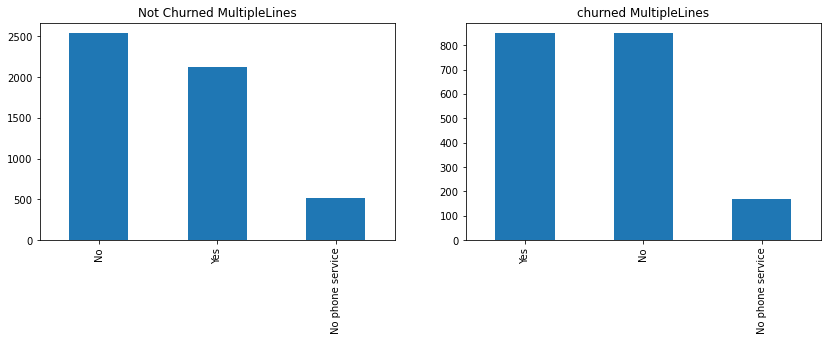

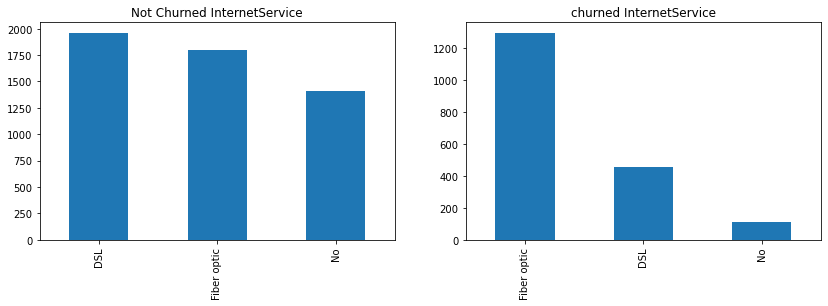

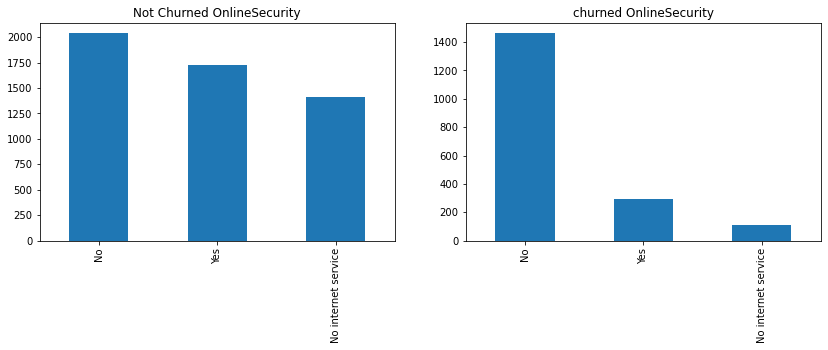

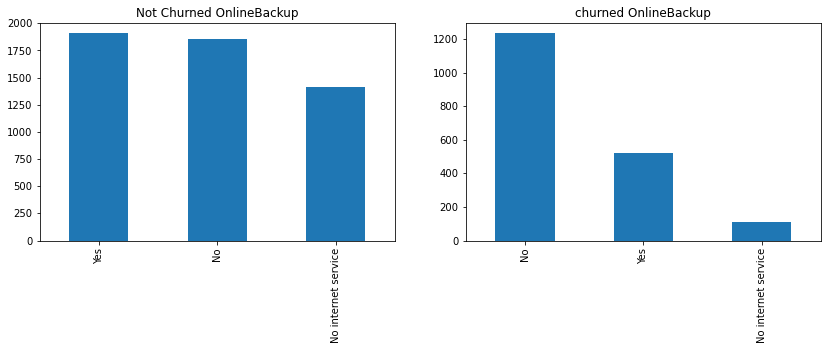

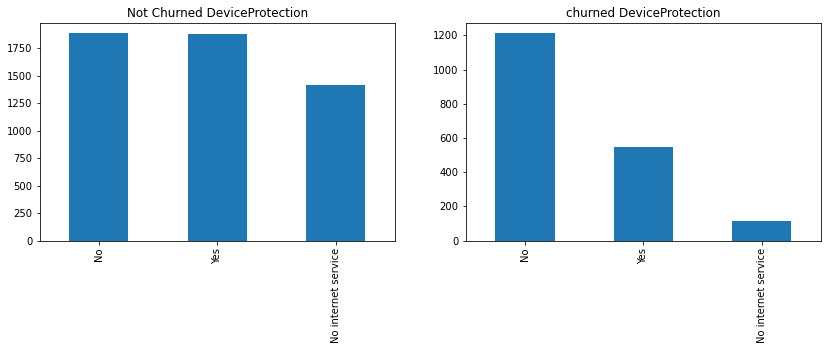

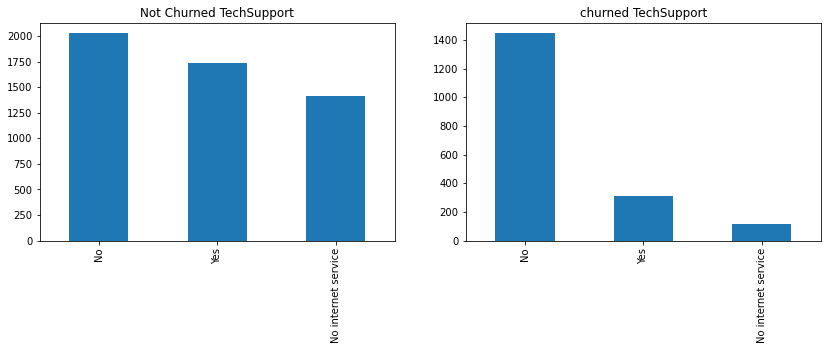

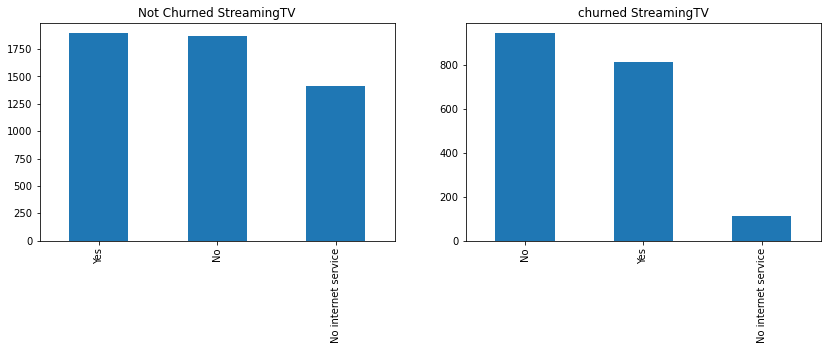

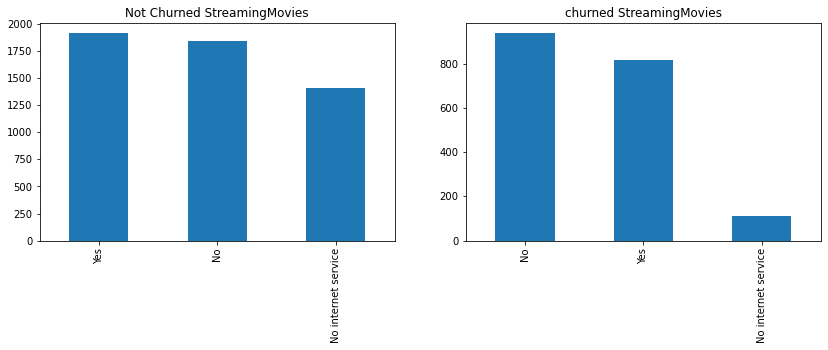

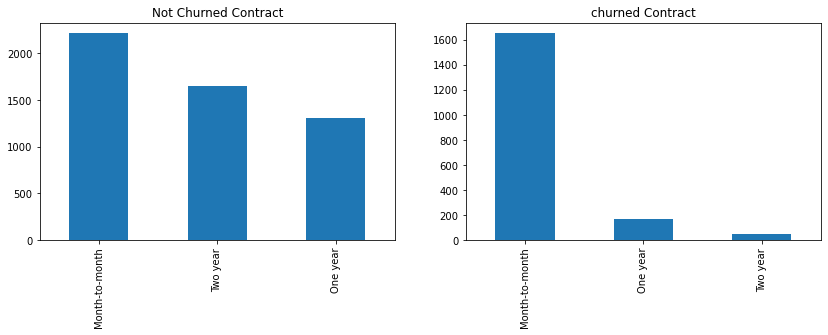

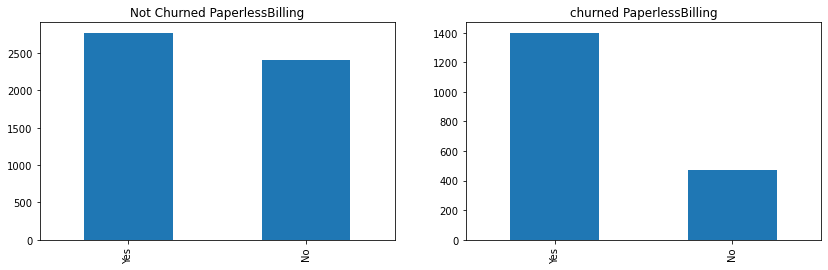

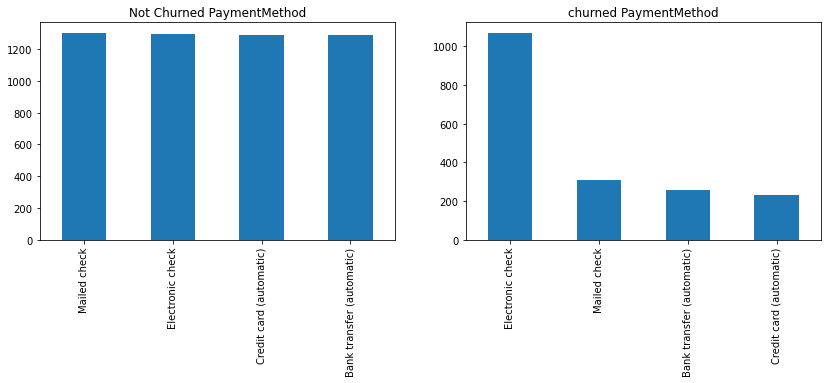

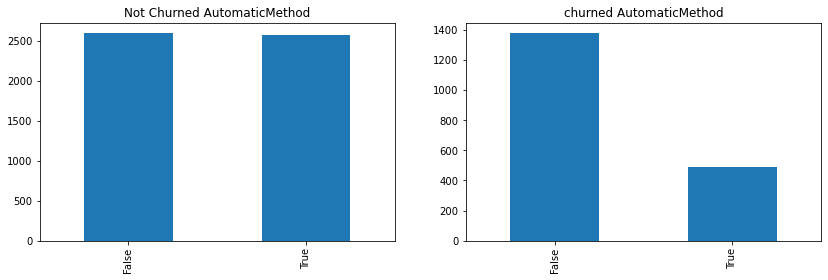

In [11]:
    
for i, feature in enumerate(categorical): 
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    data[data.Churn == 'No'][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('Not Churned ' + feature)
    data[data.Churn == 'Yes'][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned '+ feature)

Interesting takeaways from a quick comparison between churned and Not churned: Internet users with Fiber optic are more likely to churn then DSL or No internet. Customers without Internet services like Online security, Online backup, Device protection or tech support are more likely to chern as well. When looking at contract terms Month-to-month plans also have high churn. With payments Electronic checks have a significantly higher turn churn rate then the other three payment methods, this is similar with non Automatic payments but a suspect this discrepancy is due to churn rate by mailed checks.   

Text(0.5, 1.0, 'churned')

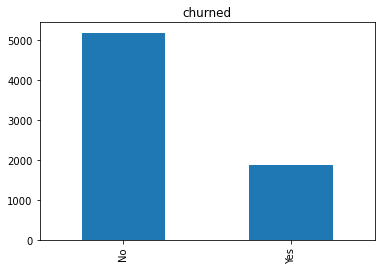

In [12]:
data['Churn'].value_counts().plot(kind='bar').set_title('churned')

We can see that Churned users make up around 2/7ths of the data set. 

For advanced EDA 2 groups stand out to me fiber optic customers and customers that pay with Electronic check. For next eda these two groups will be examined further. 